<a href="https://colab.research.google.com/github/sainathnallagonda/YULU-Hypothesis-Testing/blob/main/Business_Case_Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 862kB/s]


In [ ]:
df = pd.read_csv('bike_sharing.csv?1642089089')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# A. Examine dataset structure, characteristics, and statistical summary.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.shape

(10886, 12)

There are 10886 rows and 12 coulums in these data

# B . Identify missing values and perform Imputation using an appropriate method.


In [ ]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


There are no NULL values

# C. Analyze the distribution of Numerical & Categorical variables, separately

In [ ]:
Numerical_df = df.select_dtypes(include=np.number)
Numerical_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
Categorical_df = df.select_dtypes(exclude=np.number)
Categorical_df.head()

,datetime
0,2011-01-01 00:00:00
1,2011-01-01 01:00:00
2,2011-01-01 02:00:00
3,2011-01-01 03:00:00
4,2011-01-01 04:00:00


<Axes: ylabel='Count'>

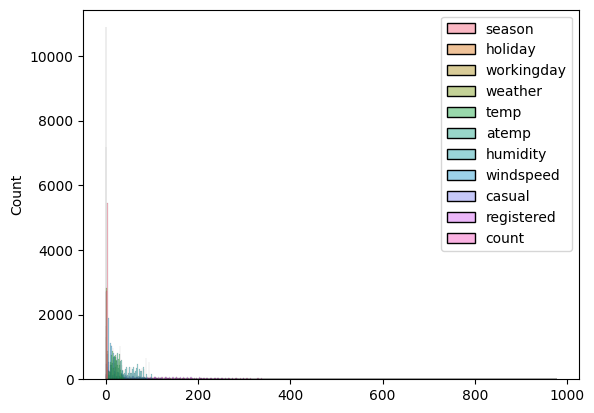

In [ ]:
sns.histplot(Numerical_df)

## D. Check for Outliers and deal with them accordingly.

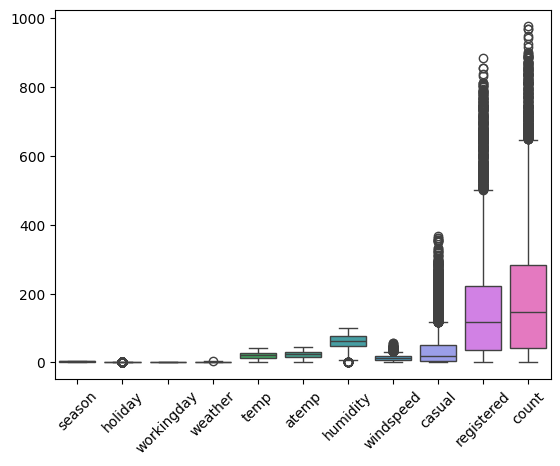

In [ ]:
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

There are outliers in these data

In [ ]:
Q1 = df['temp'].quantile(0.25)
Q3 = df['temp'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

12.299999999999999


In [ ]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

44.69
-4.51


In [ ]:
outliers = df[(df['temp'] > upper_limit) | (df['temp'] < lower_limit)]
print(outliers)

Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []


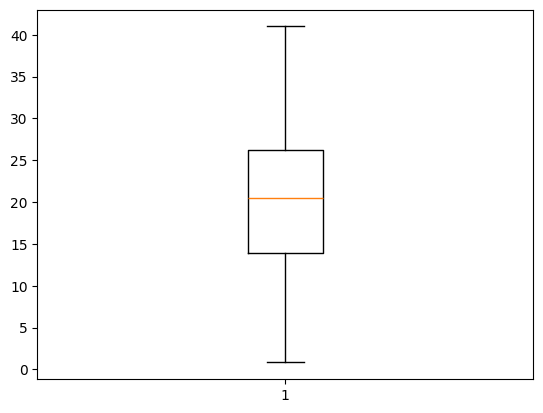

In [ ]:
plt.boxplot(df['temp'])
plt.show()

# 2. Try establishing a Relationship between the Dependent and Independent Variables.

In [ ]:
correlation_matrix = df.select_dtypes(include=np.number).corr()
correlation_matrix


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<Axes: >

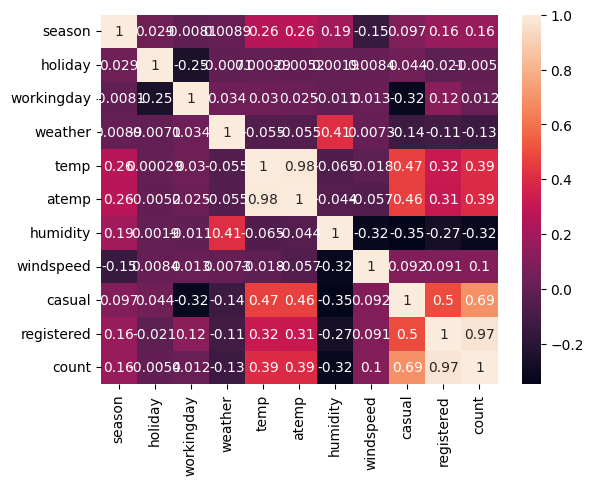

In [ ]:
sns.heatmap(correlation_matrix, annot=True)

<Axes: xlabel='workingday', ylabel='count'>

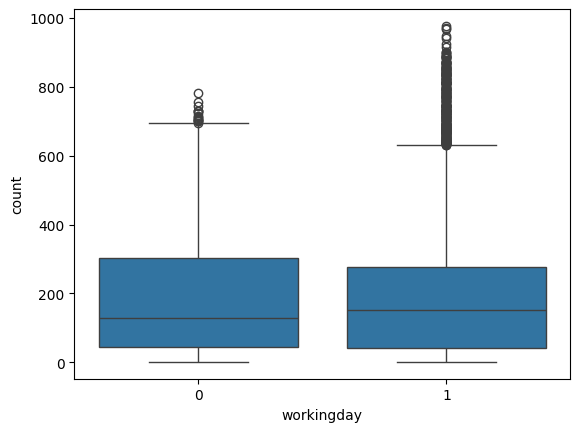

In [ ]:
sns.boxplot(x='workingday', y='count', data=df)


<Axes: xlabel='season', ylabel='count'>

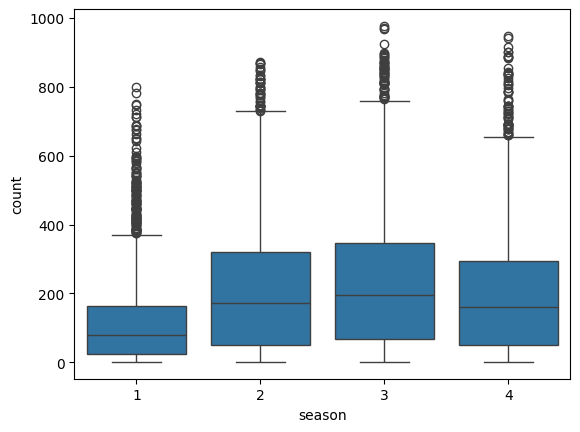

In [ ]:
sns.boxplot(x='season', y='count', data=df)


<Axes: xlabel='weather', ylabel='count'>

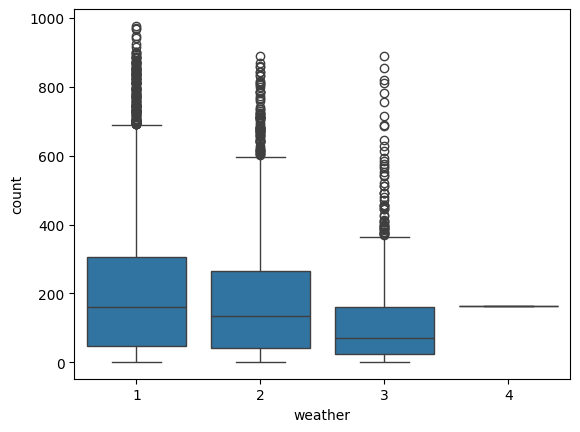

In [ ]:
sns.boxplot(x='weather', y='count', data=df)


# 3. Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?

 NULL Hypothesis Assumption:

In [ ]:
#Null hypothesis (H0) - There is no significant difference between the no. of bike rides on Weekdays and Weekends.
#Alternative hypothesis (Ha) - There is a significant difference between the no. of bike rides on Weekdays and Weekends.

In [ ]:
from scipy import stats

# Separate the data into two groups (working day and not working day)
workingday = df[df['workingday'] == 1]['count']
non_workingday = df[df['workingday'] == 0]['count']

# Perform T-test
t_stat, p_value = stats.ttest_ind(workingday, non_workingday)

# Output the result
t_stat, p_value

# alpha = 0.05


(1.2096277376026694, 0.22644804226361348)

In [ ]:
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the no. of bike rides on Weekdays and Weekends.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the no. of bike rides on Weekdays and Weekends.")

Fail to reject the null hypothesis. There is no significant difference between the no. of bike rides on Weekdays and Weekends.


The T-test for workingday suggests that working day significantly affects the number of cycles rented.

# 4.Check if the demand of bicycles on rent is the same for different Weather conditions ?

In [ ]:
weather_1 = df[df['weather'] == 1]['count'].mean()
weather_2 = df[df['weather'] == 2]['count'].mean()
weather_3 = df[df['weather'] == 3]['count'].mean()
weather_4 = df[df['weather'] == 4]['count'].mean()

print(weather_1,weather_2,weather_3,weather_4)

205.23679087875416 178.95553987297106 118.84633294528521 164.0


In [ ]:
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(df[df['weather'] == 1]['count'], df[df['weather'] == 2]['count'], df[df['weather'] == 3]['count'], df[df['weather'] == 4]['count'])
f_statistic,p_value

(65.53024112793271, 5.482069475935669e-42)

In [ ]:
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in bicycle demand for all weather conditions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in bicycle demand for all weather conditions.")

Reject the null hypothesis. There is a significant difference in bicycle demand for all weather conditions.


# 5. Check if the demand of bicycles on rent is the same for different Seasons?

In [ ]:
f_statistic, p_value = f_oneway(df[df['season'] == 1]['count'], df[df['season'] == 2]['count'], df[df['season'] == 3]['count'], df[df['season'] == 4]['count'])
f_statistic,p_value

(236.94671081032106, 6.164843386499654e-149)

In [ ]:
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in bicycle demand for all seasons.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in bicycle demand for all seasons.")

Reject the null hypothesis. There is a significant difference in bicycle demand for all seasons.


# 6. Check if the Weather conditions are significantly different during different Season


In [ ]:
contingency_table =  pd.crosstab(df['season'], df['weather'])
contingency_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


The ANOVA for season and weather shows that the demand for cycles differs across seasons and weather conditions.

In [ ]:
from scipy.stats import chi2_contingency
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)
chi2_statistic, p_value, dof, expected

(49.158655596893624,
 1.549925073686492e-07,
 9,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

In [ ]:
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in weather conditions across different seasons.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in weather conditions across different seasons.")

Reject the null hypothesis. There is a significant difference in weather conditions across different seasons.


The Chi-square test indicates a significant relationship between weather and season, meaning certain weather conditions are more common in specific seasons.

<Axes: xlabel='weather', ylabel='season'>

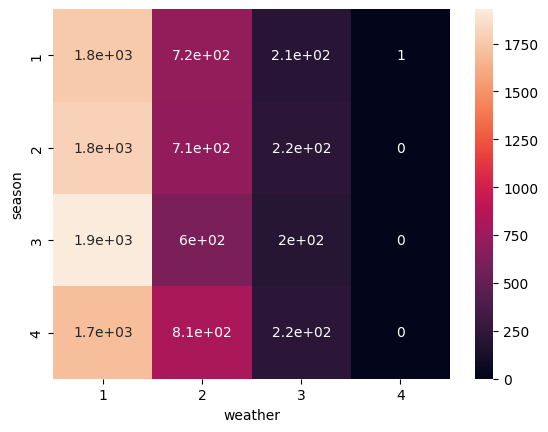

In [ ]:
sns.heatmap(contingency_table, annot=True)